# Do we have a subject? Let's conduct some experiments

In our journey through Process Automation, we'll explore the fundamentals of conducting an experiment, analyzing the data, and subsequently generating a comprehensive report in Word or PDF format.

To achieve this, we will design two intertwined classes:

1. `Subject`: This class is responsible for instantiating an individual or subject who will undergo an experiment. It will house attributes and methods specific to the subject's details and responses.

2. `Experiment`: This is an abstract class that lays out the blueprint for various types of experiments. It provides generic guidelines and structures, ensuring flexibility and consistency across different experimental designs.


Let us create these two classes following the provided gudelines.

## Subject class

Create a class for defining the *experimental subject* of an experiment.

`__init__` --> 2 parameters: `subject_id` and `info`.

`__repr__` --> Representation method. Format strings will help to see data in a nice manner :)

In [1]:
class Subject():
    """
    Represents an experimental subject.
    
    Attributes:
        id (str): 9-digit identifier for the subject.
        info (dict): Preliminary data, e.g., sociodemographic details.
        results (dict): Outcomes of the tests conducted on the subject.
    """
    
    def __init__(self, subject_id: str, info: dict) -> None:
        """
        Initialize a new experimental subject.
        
        Parameters:
            subject_id (str): The ID of the subject.
            info (dict): A dictionary containing preliminary information.
        """
        self.id = subject_id
        self.info = info
        self.results = dict()
        
    def __repr__(self) -> str:
        """
        Magic method to display the subject's data.
        
        The ':<20' pads the string with spaces to ensure a consistent display width.
        
        Returns:
        - str: A formatted string displaying the subject's information and results.
        """
        s = f'Data for ID {self.id:<20}\n\n'
        # We iterate the (key,value)-pair of info dict for getting personal data.
        for k, v in self.info.items():
            s += f"{k:<20} {v:<20}\n"
        # We iterate the results dict for getting
        for k, v in self.results.items():
            s += f"{k:<20} {v:<20}\n"
        return s

Let's see how our class works:

In [2]:
# Creating data
info_subj1 = {'name': 'Luciano Gabbanelli', 'age': 122, 'birth_date': '01-01-1908', 'years_of_education': 60}
# Instantiate a subject
subject_1 = Subject('123456789', info_subj1)

In [3]:
subject_1

Data for ID 123456789           

name                 Luciano Gabbanelli  
age                  122                 
birth_date           01-01-1908          
years_of_education   60                  

In [4]:
subject_1.id

'123456789'

In [5]:
subject_1.info

{'name': 'Luciano Gabbanelli',
 'age': 122,
 'birth_date': '01-01-1908',
 'years_of_education': 60}

In [6]:
subject_1.results

{}

In [7]:
subject_1.__repr__

<bound method Subject.__repr__ of Data for ID 123456789           

name                 Luciano Gabbanelli  
age                  122                 
birth_date           01-01-1908          
years_of_education   60                  
>

## Experiment class

Let us define an abstract class to then conduct different type of experiments. This class should be general enough such different experiments can be performed.

The class will have 4 methods:
* `__init__`: constructor. 4 attributes.
* `instructions`: will provide guidelines on how to conduct the experiment.
* `correct_data`: will take raw data and calculate a result.
* `conduct_experiment`: will carry out the experiment.

In [8]:
from typing import List, Any

class Experiment():
    """
    Represents and manages an experimental procedure.
    
    Attributes:
        name (str): Name of the experiment.
        subject (Subject): The participant of the experiment.
        instructions (str): Guidelines for the experiment.
        data (List[Any]): Data collected during the experiment.
    """

    def __init__(self, subject: Subject, exp_name: str = 'Experiment', exp_instructions: str = 'Attention!') -> None:
        """
        Initialize a new experiment.

        Parameters:
            subject (Subject): The subject participating in the experiment.
            exp_name (str, optional): The name of the experiment. Default is 'Experiment'.
            exp_instructions (str, optional): The guidelines for the experiment. Default is 'Attention!'.
        """
        self.exp_name = exp_name
        self.subject = subject
        self.exp_instructions = exp_instructions
        self.data = []  # List to store the data collected during the experiment.
        
    def display_instructions(self) -> None:
        """Display the instructions for the experiment."""
        print(self.exp_instructions)
    
    def correct_data(self) -> None:
        """
        Process and correct the raw data collected during the experiment.
        This method is intended to be overridden by subclasses to provide specific data correction for each experiment.
        """
        pass
    
    def conduct_experiment(self) -> None:
        """
        Execute the experimental procedure.
        This method is intended to be overridden by subclasses to provide specific steps or details for each experiment.
        """
        pass

Let us instantiate a general experiment for Luciano:

In [9]:
general_exp = Experiment(subject_1)

Let us see some of its attributes:

In [10]:
# Create the format string
format_string = "{:<15}{:>10}"

# Print the details using the format string
print('An instance for the abstract Experiment class:')
print(format_string.format("Name:", general_exp.exp_name))
print(format_string.format("Instructions:", general_exp.exp_instructions))
print(format_string.format("List:", str(general_exp.data))) # Convert the list to a string
print()
print('For the subject instance:')
print("subject:", general_exp.subject)

An instance for the abstract Experiment class:
Name:          Experiment
Instructions:  Attention!
List:                  []

For the subject instance:
subject: Data for ID 123456789           

name                 Luciano Gabbanelli  
age                  122                 
birth_date           01-01-1908          
years_of_education   60                  



**Now we are ready to prepare our first experiment!**

## Let us dive into the first experiment!

### Reaction Time function

To conduct the first experiment, we will use two modules/libraries: `time` and `random`:
* `time` will help us measure time during our experiment.
* `random` will allow us to generate random numbers.


Let us create a function called `reaction_time_experiment` that executes a reaction time test. The function should be called with two parameters:

* `n_trials` (int): defines the number of times a stinulus appears in the experiment.
* `pause_range` (int): defines the maximum range of seconds that can elapse between one stimulus and the next one.

Using:

* The function `time.time()` to return the current time in seconds.
* The function `random.random()` to generate a random number between 0 and 1 and vary the pause duration.
* The function `time.sleep(pause)` to pause for `pause` seconds.
* The function `input()` that waits for a user input, halting execution until the ENTER key is pressed.

**Warning:** We are not interested in the user's input; we are measuring reaction times. The user should press ENTER as quickly as possible.

**Hint in pseudocode:**

```
Given an empty list [] 

Given an integer "n_trials"

Do "n_trials" times:
  Take a time 0
  Wait some random time (pause)
  Print what to do, something like "Press ENTER:"
  Ask for input 
  Take a time 1
  Calculate the difference between times
  Add the difference to the list

```

Three points are worth to be mentioned:

1. You are only interested in the time between when the instructions appear and the input is executed.
2. The empty list will be the attribute called `data` in our `Experiment` class.
3. The printed instructions by hand will be replaced by the attribute called `instructions` in our `Experiment` class.

In [11]:
import time
import random

def reaction_time_experiment(n_trials: int, pause_range: int = 10) -> List[float]:
    """
    Conduct a reaction time experiment.
    
    This function measures the time taken by the user to press ENTER after a random pause. 
    The pause duration is randomly chosen within the provided `pause_range`.

    Parameters:
        n_trials (int): The number of times the test will be repeated.
        pause_range (int): The maximum range (in seconds) for the random pause. Default is 10 seconds.

    Returns:
        List[float]: A list of reaction times recorded during the experiment.
    """
    my_data = []

    for _ in range(n_trials):
        # Record the start time
        t0 = time.time()
        # Generate a random pause duration within the provided range
        pause = random.random() * pause_range
        # Pause for the randomly determined duration
        time.sleep(pause)
        # Prompt the user to press ENTER
        print("Press ENTER as quickly as possible!")
        input()
        # Calculate the reaction time, adjusting for the pause
        t1 = time.time() - t0 - pause
        # Add the calculated reaction time to the list
        my_data.append(t1)

    return my_data

Let us try our experiment individually:

In [19]:
reaction_time_experiment(3,7)

Press ENTER as quickly as possible!
Press ENTER as quickly as possible!
Press ENTER as quickly as possible!


[0.41106327345773597, 0.39836325689020935, 0.34143475758198694]

A more sophisticated experiment would solicit input through a graphical interface using tools like Tkinter, Kivy, or others. We could even use these interfaces to display a red circle on your screen instead of a prompt. However,  I'll leave these enhancements for you to explore and experiment with at your leisure. This aspect won't be evaluated, so feel free to delve into it only if your Squad has some spare time :)

### Inherit a new class from `Experiment` with our function

Now we are ready to use our function `reaction_time_experiment` as a method for a new subclass inherited from the `Experiment` class. In this manner, we can lunch our recently created experiment as a mathod of this new subclass that we will call `ReactionTime`. 

So let us create this new subclass called `ReactionTime` inherited from the class `Experiment`. Instead of taking external variables like in our function, such as `my_data` or the instructions on what to do, it will use the atributes from the superclass, such as `data` or `instructions`. Besides, we will have to override the two empty methos belonging to the superclass.

For this particular experiment of reaction time we will use:

* `correct_data`: will provide the mean and variance of the taken timen in the experiment and store the data in the dictionary called `results`. This can be done with these two lines: `self.sujeto.results['MedinReaccion'] = mu` and `self.sujet.results['VarianceReaccion'] = var` (but no with uppercase, `Subject`, as we are calling an instance of this class).
* `conduct_experiment`: we will use the same code from the "reaction_time" function.

**Note:** As you can notice, this class has the `Suject` class inherited from the `Experiment` class.

In [12]:
class ReactionTime(Experiment): 
    """
    A subclass derived from the "Experiment" class, tailored to measure a participant's reaction time.
    Inherits all methods and attributes of the parent class.
    """

    
    def __init__(self, *args, **kwargs):
        """
        Initialize the "ReactionTime" subclass.
        Utilizes the super() function to inherit the properties and behaviors from the parent "Experiment" class.
        """
        super().__init__(*args, **kwargs)
        
    def correct_data(self) -> None:
        """
        Process and correct the raw data collected with conduct_experiment method; i.e. the reaction time experiment.
        Computes the mean and variance of the collected data and updates the associated subject's results (dict) with these statistics.
        """
        mu = sum(self.data) / len(self.data)
        var = sum([(x - mu)**2 for x in self.data]) / len(self.data)
        self.subject.results['MeanReaccion'] = mu
        self.subject.results['VarianceReaccion'] = var

    def conduct_experiment(self, n_trials: int, pause_range: int = 10) -> None:
        """
        Administer the reaction time experiment.
        
        The experiment works as follows:
            1. Introduce a random pause.
            2. Present a prompt to the participant with the instructions.
            3. Measure the time taken by the participant to respond (by pressing ENTER).

        Parameters:
            n_trials (int): Number of repetitions of the experiment.
            pause_range (int, optional): Mean duration (in seconds) for the random pause before each prompt. Defaults to 10 seconds.
        """
        for _ in range(n_trials):
            t0 = time.time()  # Record the start time
            pause = random.random() * pause_range  # Generate a random pause duration within the provided range
            time.sleep(pause)  # Pause for the randomly determined duration
            self.display_instructions()  # Display instructions
            input()  # Wait for the user's reaction
            t1 = time.time() - t0 - pause  # Calculate the reaction time, adjusting for the pause
            self.data.append(t1)  # Store the reaction time
        
        self.correct_data()  # Process the collected data and compute the results for the subject.

### Instantiate the new class `ReactionTime` and run the experiment

Steps:

1. Create a random string ID with 9 digits. You can use the following line: `subject_id = str(random.random())[2:]`
2. Understand why the previous line generates a valid ID.
3. Instantiate a new subject. Invent one!
4. Instantiate the experiment `ReactionTime`.
5. Call the `conduct_experiment` method belonging to your new and recently instantiated class.

In [14]:
# Set a seed for reproducibility
random.seed(42)

# Generate a random string as ID
subject_id = str(random.random())[2:11]
print(len(subject_id))

# Instantiate Subject
new_info = {'name': 'Arquímedes de Siracusa', 'age': 2310, 'birth_date': '287 a. C.', 'years_of_education': 75}
amazing_subject = Subject(subject_id, new_info)
print(amazing_subject)

# Instantiate ReactionTime
reaction_test = ReactionTime(amazing_subject, exp_name = 'Reaction Time', exp_instructions = 'Press ENTER as quickly as possible!')

9
Data for ID 639426798           

name                 Arquímedes de Siracusa
age                  2310                
birth_date           287 a. C.           
years_of_education   75                  



In [16]:
# Call the conduct_experiment method
reaction_test.conduct_experiment(n_trials=5, pause_range=4)

Press ENTER as quickly as possible!
Press ENTER as quickly as possible!
Press ENTER as quickly as possible!
Press ENTER as quickly as possible!
Press ENTER as quickly as possible!


### Let us now see which data we have generated:

You can notice that the subject that performs the experiment has new data associated in the empty result dictionary generated when created!!

In [18]:
# Create the format string
format_string = "{:<15}{:>10}"

# Call the attributes of our instance of the reaction time experiment
print('The instance for the Reaction Time Experiment:')
print(format_string.format("Name:", reaction_test.exp_name))
print(format_string.format("Instructions:", reaction_test.exp_instructions))
print("Collected data:\n", reaction_test.data)
print('\n\n')
print('The atributes of the subject instance are accesible from my new instance of the experiment:\n')
print("subject:", reaction_test.subject)

The instance for the Reaction Time Experiment:
Name:          Reaction Time
Instructions:  Press ENTER as quickly as possible!
Collected data:
 [0.7425871270432922, 0.4256285952063843, 0.472788150920334, 0.46495136313154806, 0.37019408522046415, 0.5577618317196809, 0.5264535966368764, 0.35927069092444563, 0.4730741055698622, 0.4141369988721344]



The atributes of the subject instance are accesible from my new instance of the experiment:

subject: Data for ID 639426798           

name                 Arquímedes de Siracusa
age                  2310                
birth_date           287 a. C.           
years_of_education   75                  
MeanReaccion         0.48068465452450226 
VarianceReaccion     0.011140568070320813



## The second experiment!

How the subject is feeling when performing the Reaction Time experiment?

### Create a Questionnaire

Create a code that creates a "questionnaire.txt" with the following content:

1. I feel calm.
2. I feel secure.
3. I am tense.
4. I am upset.
5. I feel at ease.

Each question will have a rating from 0 to 3 that the user will enter after conducting the Reaction Time experiment.

Note: Are you up to a little reseach on measuring anxiety? You can start with the questionnaire of anxiety called STAI.

In [12]:
import os

directory = 'Files'
if not os.path.exists(directory):
    os.makedirs(directory)

with open('Files/questionnaire.txt', 'w') as out:
    out.write(
'''1. I feel calm.
2. I feel secure.
3. I am tense.
4. I am upset.
5. I feel at ease.''')

### Questionnaire Experiment

Create a subclass named Questionnaire that inherits from Experiment:


* It should have an initialization method `__init__` that inherits the attributes from `Experiment`.
* Additionally, it should have an attribute named `path_questionnaire` which holds the path to the questionnaire to be administered.
* Implement a method called `load_questions(self, path)` that takes in this path (`path_questionnaire`) and loads the questions into a list. The list should be stored in a `self.questions` attribute.
* Update the `correct_data` method inherited from the superclass `Experiment`. This method should calculate the sum of all the scores assigned to each questionnaire question (as mentioned earlier, the answers to the questions are numerical) and save it in the `results` dictionary of the subject instance under the key `'Total'`.
* Update the `conduct_experiment(self)` method so that it executes the experiment.

    **Pseudocode hint:**

        Display the instruction
        Take each question using input()
        Cast the input to an integer
        Store the response in self.data
        At the end, execute correct_data

    **Bonus:** add a check to ensure the response is valid and is an integer.

    **Idea:** How about using a `Try`, `Except` approach to re-prompt for a response if needed?

In [32]:
class Questionnaire(Experiment):
    '''
    Another test case that inherits from Experiment. This time, during initialization, 
    questions are loaded into the self.questions attribute.
    '''
    def __init__(self, path_questionnaire: str, *args, **kwargs) -> None:
        '''
        Initialize the Questionnaire subclass, inheriting attributes from the superclass, Experiment.

        Args:
            path_questionnaire (str): Path to the file containing the questions.
        '''
        super().__init__(*args, **kwargs)
        self.load_questions(path_questionnaire)
        
    def load_questions(self, path: str) -> None:
        '''
        Load questions from a specified file and store them in the self.questions attribute.
    
        Each line in the file is treated as a separate question. The method reads the file, 
        splits it by lines, and assigns the resulting list of questions to self.questions.

        Args:
            path (str): Path to the file containing the questions.
        '''
        # Función que lee el txt y guarda cada renglón en self.preguntas
        with open(path, 'r') as f:
            questions = f.read().split('\n') # Split by lines
        self.questions = questions
        
    def correct_data(self) -> None:
        '''
        Process and correct the raw data collected during the questionnaire.
        Calculates the total score from the questionnaire and updates the subject's results.
        '''
        self.subject.results[f'Total{self.name}'] = sum(self.data)

    def conduct_experiment(self):
        '''
        Conduct the questionnaire experiment.
        
        The procedure involves displaying each question and recording the participant's answer.
        '''
        self.display_instructions()
        for qtn in self.questions:
            while True:  # Keep asking until a valid integer between 0 and 3 is provided
                try:
                    answer = int(input(qtn))
                    if 0 <= answer <= 3:  # Check if the answer is within the allowed range
                        break  # Exit the loop once a valid integer is provided
                    else:
                        print("Invalid input. Please enter a number between 0 and 3.")
                except ValueError:  # Handle non-integer inputs
                    print("Invalid input. Please enter a valid integer.")
            self.data.append(answer)
        self.correct_data()

### Take the Questionnaire Experiment

The only ingredient left is the instruction for the experiment. Here I left it for you:

Below are some statements that people use to describe themselves. 
Read each statement and press the number that indicates how you feel right now, being 
0 = NO, 1 = A LITTLE, 2 = QUITE A BIT, 3 = VERY MUCH.

Instantiate the class `Questionnaire` and take the test for our `amazing_subject`

In [33]:
instruction = '''Below are some statements that people use to describe themselves. 
Read each statement and press the number that indicates how you feel right now, being 
0 = NO, 1 = A LITTLE, 2 = QUITE A BIT, 3 = VERY MUCH.'''

stai_test = Questionnaire('Files/questionnaire.txt', amazing_subject, instructions=instruction, name='Questionnaire')

In [40]:
stai_test.conduct_experiment()

Below are some statements that people use to describe themselves. 
Read each statement and press the number that indicates how you feel right now, being 
0 = NO, 1 = A LITTLE, 2 = QUITE A BIT, 3 = VERY MUCH.


In [41]:
amazing_subject

Data for ID 639426798           

name                 Arquímedes de Siracusa
age                  2310                
birth_date           287 a. C.           
years_of_education   75                  
MedinReaccion        0.8919886114052347  
VarianceReaccion     0.3502240149325104  
TotalQuestionnaire   17                  

## Report

Una vez realizado el ejercicio vamos a generar una clase para realizar el reporte del experimento.

La clase Reporte va a generar un documento que contendrá: 
- Un método para analizar los datos resultado del experimento;
- Un método para crear gráficos a partir de los resultados.
- Un método para para generar el informe final


https://python-docx.readthedocs.io/en/latest/


In [75]:
# !pip install python-docx
# !pip install matplotlib
# !pip install seaborn


In [76]:
from docx import Document
from docx.shared import Cm

import matplotlib.pyplot as plt
import seaborn as sns



In [80]:
class Report():
    '''This class generates a report for an instantited subject that has taken some Experiments'''
    def __init__(self, subject: Subject, experiment: Experiment, img_path = 'Images/tmp.png'):
        self.subj = subject
        self.exp = experiment
        self.img_path = img_path
    
    def create_graphics(self):
        '''Genera un gráfico de lineas y un histograma para 
        los datos de los experimentos'''
        fig, ax = plt.subplots(1,2, figsize=(11,4))
        ax[0].plot(self.exp.data)
        ax[0].set_ylabel('Error (ms)')
        ax[0].set_xlabel('Trials')
        sns.distplot(self.exp.data, ax=ax[1])
        ax[1].set_ylabel('Frequencia')
        ax[1].set_xlabel('Error (ms)')
        return ax
        
    def generate_report(self):
        '''Función que genera un documento de Word en base a los datos
        de Sujeto y Experimento. Ver más en: 
        
        '''
        # Instanciamos un Documento
        document = Document()
        
        # Agregamos un Titulo
        document.add_heading(f'Informe de Resultados', 0)
        # Info del sujeto
        p = document.add_paragraph(f'Subject ID: ')
        p.add_run(f'{self.subj.id}').bold = True
        
        # Agregamos una lista de items iterando
        # el diccionario de info del Sujeto
        for k, v in self.subj.info.items():
            document.add_paragraph(f'{k}= {v}',
                                   style='List Bullet')
        
        # Agregamos resultados, hay distintos estilos disponibles
        p = document.add_paragraph(f'Resultados de {self.exp.name}', 
                                   style='Intense Quote')
                
        # iterar los resultados en self.suj.resultados
        # agregando otra lista de items 
        for k, v in self.subj.results.items():
            document.add_paragraph(f'{k}= {v}',
                                   style='List Bullet')
        
        
        # Agregamos los gráficos
        ax = self.create_graphics()
        plt.savefig(self.img_path) # usamos esta ruta provisorialmente
        plt.close() # para no mostrar el plot y solo guardarlo
        document.add_picture(self.img_path, width=Cm(14))

        # Guardamos el archivo docx 
        fp = f'reporte_{self.subj.id}.docx'
        document.save(fp)
        return fp

In [81]:
# Instanciamos
rep = Report(amazing_subject, reaction_test)

/var/folders/jb/mvgwgpp93wvdlx3m2f6tbc3m0000gn/T/ipykernel_32791/2401490309.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.exp.data, ax=ax[1])


FileNotFoundError: [Errno 2] No such file or directory: 'Images/tmp.png'

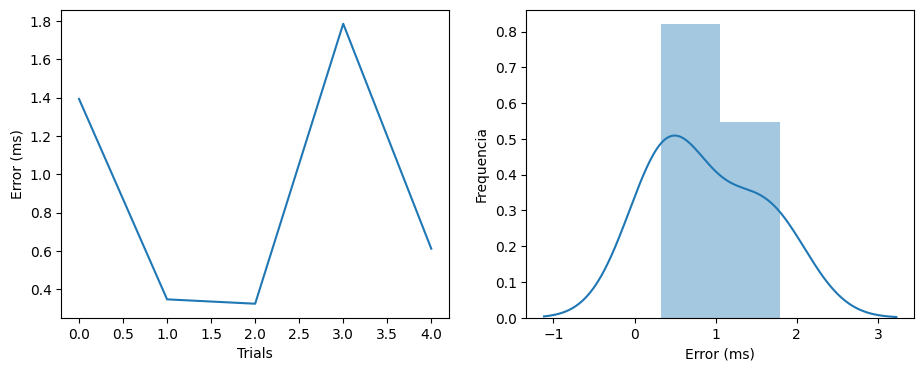

In [82]:
# Generar reporte
fp = rep.generate_report()